In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = "coin_Bitcoin.csv" 
df = pd.read_csv(file_path)


In [3]:
print(df.head()) 
print("\nDataset Info:")
print(df.info())  
print("\nSummary Statistics:")
print(df.describe())  

   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null  

In [4]:
print("\nMissing Values Per Column:")
print(df.isnull().sum())



Missing Values Per Column:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


In [5]:
df = df.dropna()

print("\nDataset after removing missing values:")
print(df.info())


Dataset after removing missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB
None


In [6]:
print("\nDuplicate Rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

print("\nDataset after removing duplicates:")
print(df.info())


Duplicate Rows: 0

Dataset after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB
None


In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
# Check for invalid dates
print("\nInvalid Dates:", df['Date'].isna().sum())


Invalid Dates: 0


In [9]:
# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

In [10]:
print("\nDataset after handling dates:")
print(df.info())


Dataset after handling dates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2991 non-null   int64         
 1   Name       2991 non-null   object        
 2   Symbol     2991 non-null   object        
 3   Date       2991 non-null   datetime64[ns]
 4   High       2991 non-null   float64       
 5   Low        2991 non-null   float64       
 6   Open       2991 non-null   float64       
 7   Close      2991 non-null   float64       
 8   Volume     2991 non-null   float64       
 9   Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 233.8+ KB
None


In [11]:
# Ensure numerical columns are valid
numeric_columns = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with non-numeric values in key columns
df = df.dropna(subset=numeric_columns)

# Remove rows with negative values (optional)
df = df[(df['High'] >= 0) & (df['Low'] >= 0) & (df['Open'] >= 0) & (df['Close'] >= 0)]
df = df[df['Volume'] >= 0]

print("\nDataset after cleaning numerical data:")
print(df.describe())


Dataset after cleaning numerical data:
               SNo                           Date          High           Low  \
count  2991.000000                           2991   2991.000000   2991.000000   
mean   1496.000000  2017-06-02 23:59:59.000000256   6893.326038   6486.009539   
min       1.000000            2013-04-29 23:59:59     74.561096     65.526001   
25%     748.500000            2015-05-17 11:59:59    436.179001    422.879486   
50%    1496.000000            2017-06-02 23:59:59   2387.610107   2178.500000   
75%    2243.500000            2019-06-20 11:59:59   8733.926948   8289.800459   
max    2991.000000            2021-07-06 23:59:59  64863.098908  62208.964366   
std     863.571653                            NaN  11642.832456  10869.032130   

               Open         Close        Volume     Marketcap  
count   2991.000000   2991.000000  2.991000e+03  2.991000e+03  
mean    6700.146240   6711.290443  1.090633e+10  1.208761e+11  
min       68.504997     68.431000  0.0

In [12]:
df = df.sort_values(by='Date')

print("\nDataset after sorting by date:")
print(df.head())


Dataset after sorting by date:
   SNo     Name Symbol                Date        High         Low  \
0    1  Bitcoin    BTC 2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC 2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC 2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC 2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC 2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  


In [13]:
if 'SNo' in df.columns:
    df = df.drop(columns=['SNo'])

print("\nDataset after dropping unnecessary columns:")
print(df.head())



Dataset after dropping unnecessary columns:
      Name Symbol                Date        High         Low        Open  \
0  Bitcoin    BTC 2013-04-29 23:59:59  147.488007  134.000000  134.444000   
1  Bitcoin    BTC 2013-04-30 23:59:59  146.929993  134.050003  144.000000   
2  Bitcoin    BTC 2013-05-01 23:59:59  139.889999  107.720001  139.000000   
3  Bitcoin    BTC 2013-05-02 23:59:59  125.599998   92.281898  116.379997   
4  Bitcoin    BTC 2013-05-03 23:59:59  108.127998   79.099998  106.250000   

        Close  Volume     Marketcap  
0  144.539993     0.0  1.603769e+09  
1  139.000000     0.0  1.542813e+09  
2  116.989998     0.0  1.298955e+09  
3  105.209999     0.0  1.168517e+09  
4   97.750000     0.0  1.085995e+09  


In [14]:
df = df.drop(columns=['Name', 'Symbol'])

print("\nDataset after dropping unnecessary columns:")
print(df.head())


Dataset after dropping unnecessary columns:
                 Date        High         Low        Open       Close  Volume  \
0 2013-04-29 23:59:59  147.488007  134.000000  134.444000  144.539993     0.0   
1 2013-04-30 23:59:59  146.929993  134.050003  144.000000  139.000000     0.0   
2 2013-05-01 23:59:59  139.889999  107.720001  139.000000  116.989998     0.0   
3 2013-05-02 23:59:59  125.599998   92.281898  116.379997  105.209999     0.0   
4 2013-05-03 23:59:59  108.127998   79.099998  106.250000   97.750000     0.0   

      Marketcap  
0  1.603769e+09  
1  1.542813e+09  
2  1.298955e+09  
3  1.168517e+09  
4  1.085995e+09  


In [15]:
# Save the cleaned dataset to a new file
cleaned_file_path = "cleaned_coin_Bitcoin.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: cleaned_coin_Bitcoin.csv


In [16]:
# Calculate daily returns (percentage change)
df['Daily Return'] = df['Close'].pct_change()

In [17]:
# Calculate moving averages (50-day and 200-day)
df['50-Day MA'] = df['Close'].rolling(window=50).mean()
df['200-Day MA'] = df['Close'].rolling(window=200).mean()

In [18]:
# Calculate the difference between High and Low (for volatility)
df['Price Diff'] = df['High'] - df['Low']


In [19]:
# Calculate volatility (standard deviation of daily returns)
df['Volatility'] = df['Daily Return'].rolling(window=50).std()


In [20]:
df = df.dropna()

In [21]:
print(df.head())

                   Date        High         Low        Open       Close  \
199 2013-11-14 23:59:59  425.899994  395.190002  406.410004  420.200012   
200 2013-11-15 23:59:59  437.890015  396.109985  419.410004  417.950012   
201 2013-11-16 23:59:59  450.260010  415.570007  417.279999  440.220001   
202 2013-11-17 23:59:59  500.579987  440.239990  440.959991  492.109985   
203 2013-11-18 23:59:59  703.780029  494.940002  496.579987  703.559998   

     Volume     Marketcap  Daily Return  50-Day MA  200-Day MA  Price Diff  \
199     0.0  5.038818e+09      0.031495   195.3966  132.887528   30.709991   
200     0.0  5.013561e+09     -0.005355   201.1880  134.254578   41.780029   
201     0.0  5.282849e+09      0.053284   207.3168  135.760678   34.690002   
202     0.0  5.907842e+09      0.117873   214.4634  137.636278   60.339996   
203     0.0  8.449070e+09      0.429680   225.7878  140.628028  208.840027   

     Volatility  
199    0.053067  
200    0.053137  
201    0.053233  
202    0

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2792 entries, 199 to 2990
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2792 non-null   datetime64[ns]
 1   High          2792 non-null   float64       
 2   Low           2792 non-null   float64       
 3   Open          2792 non-null   float64       
 4   Close         2792 non-null   float64       
 5   Volume        2792 non-null   float64       
 6   Marketcap     2792 non-null   float64       
 7   Daily Return  2792 non-null   float64       
 8   50-Day MA     2792 non-null   float64       
 9   200-Day MA    2792 non-null   float64       
 10  Price Diff    2792 non-null   float64       
 11  Volatility    2792 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 283.6 KB


In [23]:
df.to_csv(cleaned_file_path, index=False)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Initialize the scaler
scaler = MinMaxScaler()

# List of columns to scale
columns_to_scale = ['Close', 'Volume', '50-Day MA', '200-Day MA', 'Price Diff', 'Volatility', 'Daily Return']

# Fit and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("\nScaled dataset:")
print(df.head())


Scaled dataset:
                   Date        High         Low        Open     Close  Volume  \
199 2013-11-14 23:59:59  425.899994  395.190002  406.410004  0.003823     0.0   
200 2013-11-15 23:59:59  437.890015  396.109985  419.410004  0.003788     0.0   
201 2013-11-16 23:59:59  450.260010  415.570007  417.279999  0.004139     0.0   
202 2013-11-17 23:59:59  500.579987  440.239990  440.959991  0.004959     0.0   
203 2013-11-18 23:59:59  703.780029  494.940002  496.579987  0.008298     0.0   

        Marketcap  Daily Return  50-Day MA  200-Day MA  Price Diff  Volatility  
199  5.038818e+09      0.503122   0.000000    0.000000    0.002307    0.381402  
200  5.013561e+09      0.457140   0.000102    0.000031    0.003168    0.382007  
201  5.282849e+09      0.530312   0.000209    0.000065    0.002617    0.382844  
202  5.907842e+09      0.610910   0.000335    0.000108    0.004611    0.395968  
203  8.449070e+09      1.000000   0.000534    0.000176    0.016155    0.606395  


In [26]:
df.to_csv(cleaned_file_path, index=False)


In [27]:
# Add derived features
df['Open-Close Diff'] = df['Open'] - df['Close']
df['High-Low Range'] = df['High'] - df['Low']
df.to_csv(cleaned_file_path, index=False)

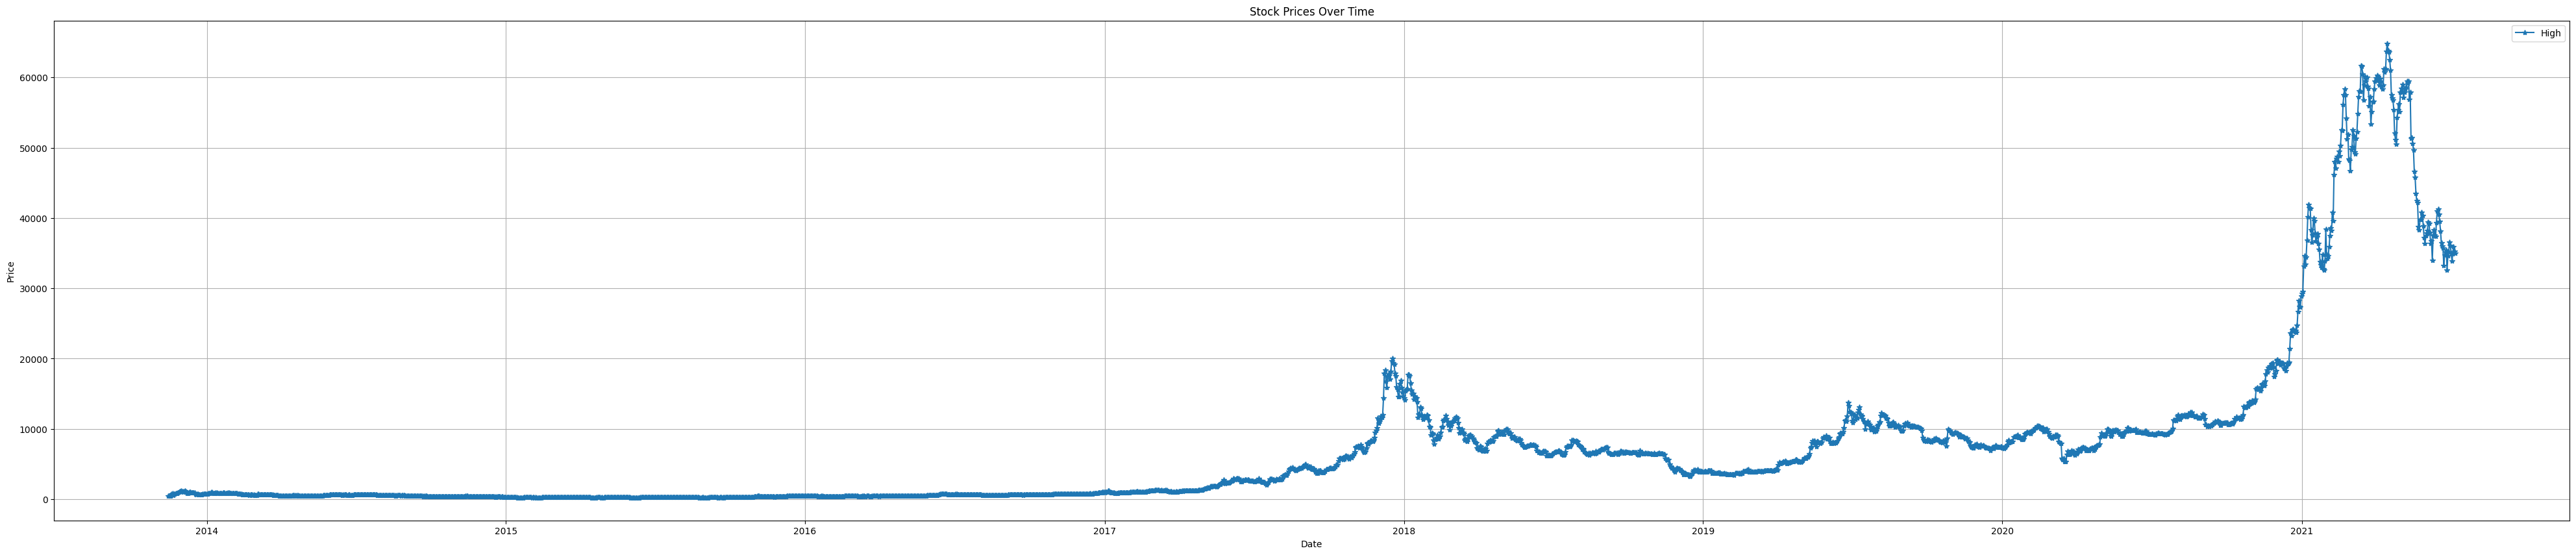

In [30]:
import matplotlib.pyplot as plt
df = pd.DataFrame(df)
df['Date'] = pd.to_datetime(df['Date'])  
df.set_index('Date', inplace=True)       

# Plot the graph
plt.figure(figsize=(50,10))
plt.plot(df.index, df['High'], label='High', marker='*')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

#plt.savefig("test")

plt.show()
